**Assignment 2 Solutions** <br>
Importing Required Libraries

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading the dataset

In [301]:
df = pd.read_csv('./extended_salary_data.csv')
m, n = df.shape
df.insert(0, column='Intercept', value=np.ones(m)) #adding a column of ones for constant in hypothesis function

Creating x, y for regression model

In [302]:
x = np.array(df.iloc[:, :-1].values)
y = np.array(df.iloc[:, -1].values)

Plotting y vs x

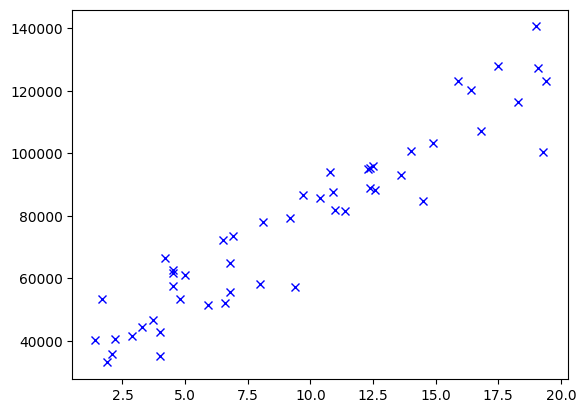

In [303]:
plt.plot(x[:,1], y, 'bx', linewidth=2)

Statistics of dataset

In [304]:
df.describe()

,Intercept,YearsExperience,Salary
count,50.0,50.000000,50.00000
mean,1.0,9.480000,77370.54740
std,0.0,5.485491,28298.92442
min,1.0,1.400000,33048.80000
25%,1.0,4.500000,53861.88000
50%,1.0,9.300000,78598.65000
75%,1.0,13.350000,95356.22500
max,1.0,19.400000,140646.44000


Splitting Dataset for training and validation

In [305]:
x_train, x_valid = np.split(x, [int(0.8*len(x))])
y_train, y_valid = np.split(y, [int(0.8*len(y))])

Defining Linear Regression Model

In [306]:
class LinearRegression:
    def __init__(self, theta0 = None, eps = 1e-5, a = 3e-5):
        self.theta = theta0
        self.eps = eps
        self.a = a
    def fit(self, x, y):
        m, n = x.shape
        self.theta = np.zeros(n)
        while True:
            oldtheta = np.copy(self.theta)
            self.theta += self.a * np.dot((y - np.dot(x, self.theta)), x) /m
            if np.linalg.norm(self.theta - oldtheta, ord=1) < self.eps:
                break
    def predict(self, x):
        return np.dot(x, self.theta)

Creating instance of model and fitting it on training dataset

In [307]:
model = LinearRegression()
model.fit(x_train, y_train)

[29576.2863726   5013.77208756]


Final Theta/Weights of Model

In [308]:
print(model.theta)

[29575.02667529  5013.87030258]


Calculating MSE and MAE

In [309]:
mse_valid = (np.linalg.norm(y_valid - model.predict(x_valid), ord=2)) ** 2 / m
mae_valid = np.linalg.norm(y_valid - model.predict(x_valid), ord=1) /m
mae_train = np.linalg.norm(y_train - model.predict(x_train), ord=1) / m
mse_train = (np.linalg.norm(y_train - model.predict(x_train), ord=2)) ** 2 /m
print('MSE on valid dataset', mse_valid)
print('MAE on valid dataset', mae_valid)
print('MSE on train dataset', mse_train)
print('MAE on train dataset', mae_train)

MSE on valid dataset 10292311.094812317
MAE on valid dataset 1239.097049534531
MSE on train dataset 72595919.45533374
MAE on train dataset 6030.438049683361


Plotting regression line over dataset

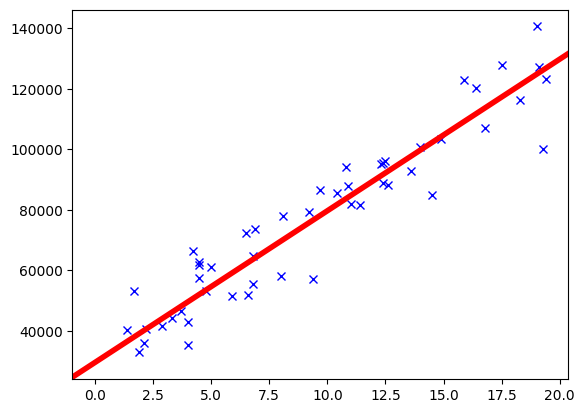

In [310]:
plt.plot(x[:,1], y, 'bx', linewidth=2)
plt.axline((0, model.theta[0]), slope=model.theta[1] , linewidth=4, color='r')
plt.show()

**BONUS**

In [311]:
df = pd.read_csv('./extended_salary_data.csv')
m, n = df.shape
df.insert(0, column='Intercept', value=np.ones(m))

Adding new column of synthetic feature

In [312]:
df.insert(2, column='NumProjectsCompleted', value=np.array((df['YearsExperience'])/2.0 + 0.5).astype(int))

Adding random noise to data

In [313]:
#adding poisson noise since Number of project completed should be integer
noise = np.random.poisson(1, m)
df['NumProjectsCompleted'] += noise

New Dataset

In [314]:
df

,Intercept,YearsExperience,NumProjectsCompleted,Salary
0,1.0,8.1,4,77884.67
1,1.0,19.1,10,127213.68
2,1.0,14.9,7,103343.52
3,1.0,12.4,8,88988.96
4,1.0,4.0,3,35214.78
5,1.0,4.0,3,42801.56
6,1.0,2.1,2,35893.61
7,1.0,17.5,11,128071.22
8,1.0,12.4,7,95436.18
9,1.0,14.5,9,84869.60


Creating x, y

In [315]:
x_new = np.array(df.iloc[:, :-1].values)
y_new = np.array(df.iloc[:, -1].values)

Plotting new column data against y

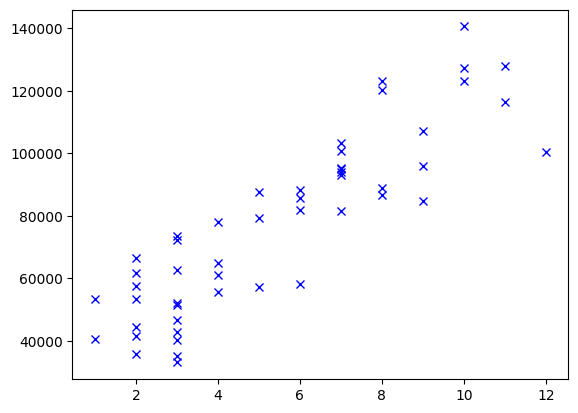

In [316]:
plt.plot(x_new[:,2], y_new, 'bx', linewidth=2)

In [317]:
x_train_new, x_valid_new = np.split(x_new, [int(0.8*len(x))])
y_train_new, y_valid_new = np.split(y_new, [int(0.8*len(y))])

In [318]:
model_new = LinearRegression()
model_new.fit(x_train_new, y_train_new)

[30875.30478721  5855.13387871 -1671.02604398]


In [319]:
print(model_new.theta)

[30874.03057198  5855.06279535 -1670.72441023]


In [320]:
mse_valid_new = (np.linalg.norm(y_valid - model_new.predict(x_valid_new), ord=2)) ** 2 / m
mae_valid_new = np.linalg.norm(y_valid - model_new.predict(x_valid_new), ord=1) / m
mae_train_new = np.linalg.norm(y_train - model_new.predict(x_train_new), ord=1) / m
mse_train_new = (np.linalg.norm(y_train - model_new.predict(x_train_new), ord=2)) ** 2 / m
print('MSE on valid dataset', mse_valid_new)
print('MAE on valid dataset', mae_valid_new)
print('MSE on train dataset', mse_train_new)
print('MAE on train dataset', mae_train_new)

MSE on valid dataset 8702241.4704372
MAE on valid dataset 1109.2203852554742
MSE on train dataset 70605414.7099444
MAE on train dataset 6092.964924116512


Comparing Old model with New

In [321]:
print("Changes:")
print('Change in MSE of Validation Dataset: ', (mse_valid - mse_valid_new))
print('Change in MAE of Validation Dataset: ', (mae_valid - mae_valid_new))
print('Change in MSE of Train Dataset: ', (mse_train - mse_train_new))
print('Change in MAE of Train Dataset: ', (mae_train - mae_train_new))

Changes:
Change in MSE of Validation Dataset:  1590069.624375116
Change in MAE of Validation Dataset:  129.87666427905674
Change in MSE of Train Dataset:  1990504.7453893423
Change in MAE of Train Dataset:  -62.526874433150624
